# CORRELATED GENES

# Preliminaries

## Imports

In [1]:
import init
from common import constants as cn
from tools import make_classification_data
from common.trinary_data import TrinaryData
from common import sample_data

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
data = make_classification_data.ClassificationData()
data.get(globals())

## Constants

In [3]:
STAGES = list(cn.STATE_NAMES)
STAGES.remove("Normoxia")
TRINARY = TrinaryData()
DF_X = TRINARY.df_X
CLF = CLASSIFIER_DCT[('T0', 'mycobactin_bacterioferritin')]

## Helper Functions

In [17]:
# Select rows with sufficiently high correlations
def getCorrelatedGenes(threshold=0.8, genes=CLF.features):
    # Returns the genes that have a threshold level of correlation w
    df_corr = DF_X.corr()
    df_corr = df_corr[genes]
    ser = df_corr.applymap(lambda v: np.abs(v)).max(axis = 1)
    ser = ser[ser > threshold]
    high_genes = list(ser.index)
    return high_genes, df_corr

# Tests
genes = list(CLF.features)
genes.remove("Rv2341")
genes.sort()
result, df_corr = getCorrelatedGenes(genes=genes)
assert(len(result) > 50)

# Correlations

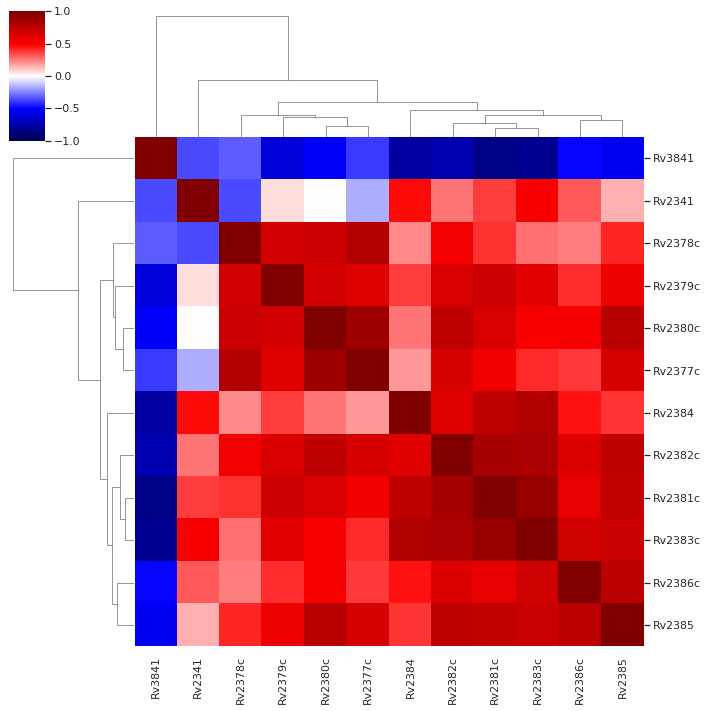

In [31]:
df_corr = CLF._df_X.corr()
sns.clustermap(df_corr, cmap="seismic", vmin=-1, vmax=1, figsize=(10, 10))

## Distributions of Correlations

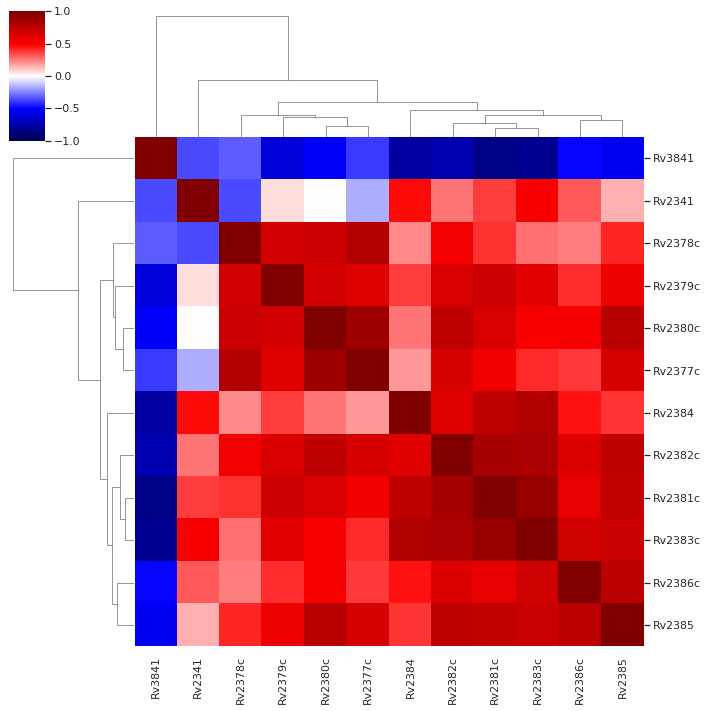

In [32]:
sns.set_theme(color_codes=True)
g = sns.clustermap(df_corr, cmap="seismic", vmin=-1, vmax=1)

In [34]:
# Select rows with sufficiently high correlations
df_corr = DF_X.corr()
df_corr = df_corr[CLF.features]
ser = df_corr.applymap(lambda v: np.abs(v)).max(axis = 1)
ser = ser[ser > 0.8]
high_genes = list(ser.index)

In [35]:
df_corr.applymap(lambda v: np.abs(v)).max(axis = 1)

Rv1927             0.273009
Rv1129c            0.307860
Rv3085             0.516047
Rv3083             0.458809
Rv3086             0.421332
                     ...   
Rv0440--Rv3417c    0.671660
Rv2734             0.471560
Rv0519c            0.426006
Rv3418c            0.473691
Rv3269             0.494872
Length: 1515, dtype: float64

In [36]:
len(high_genes)

68

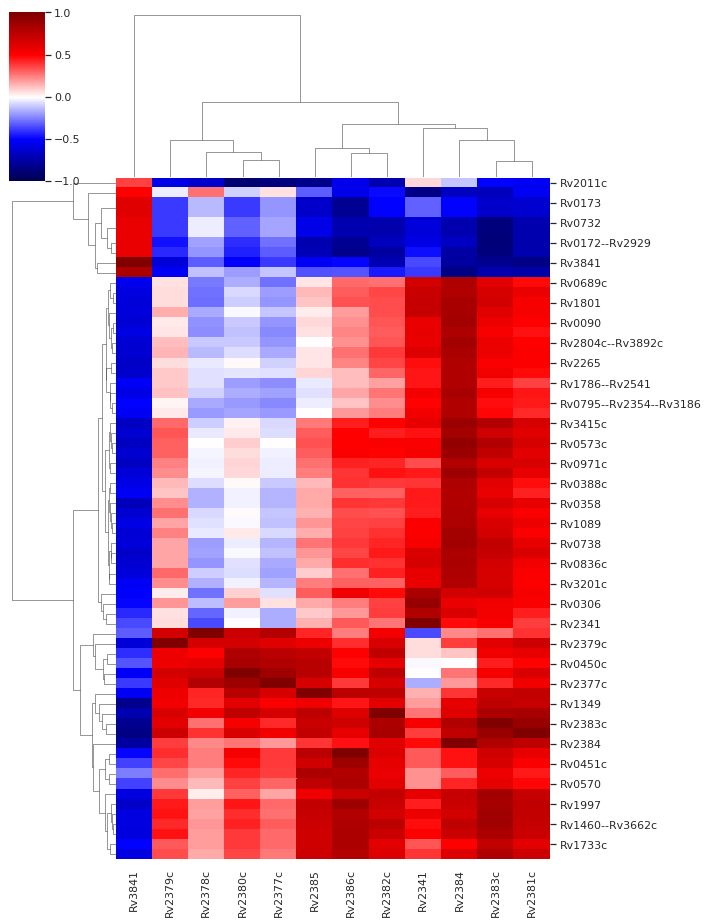

In [37]:
# Select rows with sufficiently high correlations
def plotCluster(threshold=0.8, is_plot=True):
    high_genes, df_corr = getCorrelatedGenes(threshold=threshold, genes=CLF.features)
    df_corr = df_corr.fillna(0)
    df_corr = df_corr.loc[high_genes, :]
    if is_plot:
        g = sns.clustermap(df_corr, cmap="seismic", vmin=-1, vmax=1, figsize=(10, 13))
    
# Tests
plotCluster()

# Distribution of Correlation Distances

In [38]:
size_dct = {}
for threshold in [0.02*n for n in range(1, 51)]:
    high_genes, _ = getCorrelatedGenes(threshold=threshold, genes=CLF.features)
    size_dct[threshold] = len(high_genes)
ser_size = pd.Series(size_dct)
#ser_size = ser_size.sort_index(ascending=False)
ser_size

0.02    1513
0.04    1513
0.06    1513
0.08    1513
0.10    1513
0.12    1513
0.14    1513
0.16    1513
0.18    1512
0.20    1511
0.22    1499
0.24    1494
0.26    1488
0.28    1454
0.30    1445
0.32    1411
0.34    1391
0.36    1373
0.38    1312
0.40    1253
0.42    1180
0.44    1115
0.46    1034
0.48     948
0.50     873
0.52     820
0.54     790
0.56     716
0.58     658
0.60     600
0.62     545
0.64     488
0.66     433
0.68     376
0.70     292
0.72     236
0.74     195
0.76     152
0.78      99
0.80      68
0.82      47
0.84      35
0.86      28
0.88      19
0.90      14
0.92      13
0.94      12
0.96      12
0.98      12
1.00       0
dtype: int64

Text(0.5, 0, 'cumulative fraction of genes')

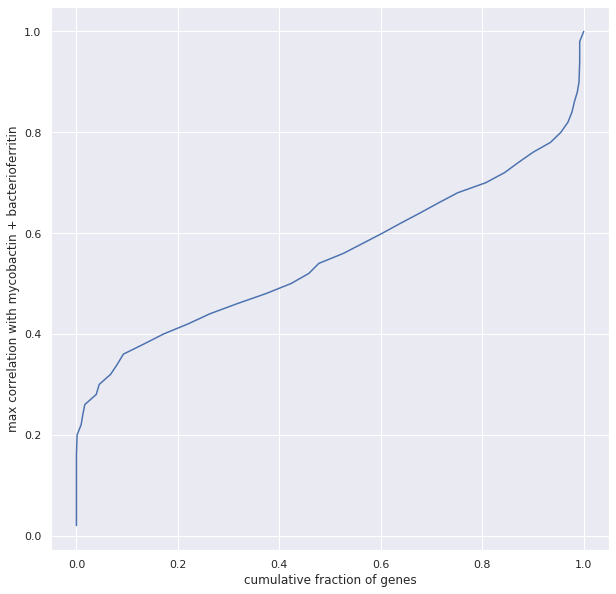

In [39]:
ser_frac = ser_size/1513
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(1-ser_frac.values, ser_frac.index)
ax.set_ylabel("max correlation with mycobactin + bacterioferritin")
ax.set_xlabel("cumulative fraction of genes")

# Correlation Data

Calculate the correlations of genes with each of the mycobactin genes.

In [23]:
genes = list(CLF.features)
genes.remove("Rv2341")
genes.sort()
_, df_corr = getCorrelatedGenes(genes=genes)

In [29]:
df_corr_abs = df_corr.applymap(lambda v: np.abs(v))
df_corr["max_abs_corr"] = df_corr_abs.max(axis=1)
df_corr = df_corr.sort_values("max_abs_corr", ascending=False)
df_corr.to_csv("GeneCorelation.csv")